<h1>Assignment 5 - Data Visualization</h1>

In this assignment, we will use data preprocessing and data visualization methods to analyze 2023 earthquake data. We will delve into the dataset to gain insights into the seismic activity observed throughout the year.

1. Read the data from '<b>earthquakes_2023_global.csv</b>' and clean the dataset. Drop columns after 'type' ('horizontalError', 'depthError', ... , 'magSource'). Keep rows with 'earthquake' Type. Columns name that might not be straightforward:
- Depth: Depth of the earthquake in kilometers.
- Mag: Magnitude of the earthquake.
- MagType: Type of magnitude measurement.
- Nst: Number of seismic stations that reported the earthquake.
- Gap: The gap between different seismic stations' coverage.
- Dmin: Minimum distance to the earthquake epicenter for the nearest station.
- Rms: Root Mean Square of the earthquake's amplitude spectrum.
- Net: Network reporting the earthquake.
- Id: Unique identifier for the earthquake event.
- Updated: Timestamp indicating when the earthquake information was last updated.
- Place: Location description of the earthquake.
- Type: Type of seismic event (e.g., earthquake).
2. Analyze the month distribution of earthquakes.
3. Analyze the frequency distribution of earthquake magnitude.
4. Analyze the relationship among magnitude, depth, and rms.
5. Analyze mean magnitude and depth by month and networks.
6. Create a heatmap for earthquake activities.

<h2>Data Preprocessing</h2>

In [2]:
# Some libraries that might be helpful
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
from folium.plugins import HeatMap
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [1]:
# Read in data

# Drop columns

# Keep only earthquakes


In [9]:
datafile = "earthquakes_2023_global.csv"
df = pd.read_csv(datafile)
df[df['type']=='earthquake']

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29T03:37:19.334Z,-6.9527,154.9829,10.000,5.20,mb,72.0,60.0,3.9240,0.93,...,2023-12-29T04:05:57.040Z,"89 km SW of Panguna, Papua New Guinea",earthquake,10.07,1.765,0.048,141.0,reviewed,us,us
26638,2023-12-29T04:38:54.109Z,32.3262,141.7386,10.000,5.10,mb,74.0,121.0,1.8030,0.70,...,2023-12-29T10:59:44.533Z,"Izu Islands, Japan region",earthquake,9.17,1.870,0.042,187.0,reviewed,us,us
26639,2023-12-29T08:42:05.747Z,-7.2411,68.0663,10.000,5.10,mb,60.0,54.0,12.7760,0.57,...,2023-12-29T08:57:05.040Z,Chagos Archipelago region,earthquake,8.02,1.792,0.090,40.0,reviewed,us,us
26640,2023-12-29T11:02:48.679Z,-19.1602,169.0428,153.264,4.70,mb,40.0,61.0,3.7460,0.82,...,2023-12-29T11:22:46.040Z,"49 km NNW of Isangel, Vanuatu",earthquake,8.52,7.433,0.081,46.0,reviewed,us,us


<h2>Month distribution of earthquakes</h2>

- Add a new column <b>'month'</b> that stores the month when each earthquake happened.
- Plot a <b>bar chart</b> for the month distribution. Include <b>title, labels</b> for the graph, and <b>values</b> for each month on each bar. Hint: you can use <b>enumerate()</b> to iterate through each bar and <b>plt.text()</b> to add values.
    - https://www.geeksforgeeks.org/enumerate-in-python/
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
- Which month has the most earthquakes and which one has the fewest?

In [11]:
# Add a new column for month
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
df['month']

0         1
1         1
2         1
3         1
4         1
         ..
26637    12
26638    12
26639    12
26640    12
26641    12
Name: month, Length: 26642, dtype: int32

In [13]:
# Group data by month
monthly_counts = df.groupby('month').size()
monthly_counts

month
1     2360
2     2376
3     2234
4     2114
5     2407
6     2164
7     2114
8     2072
9     2018
10    2329
11    2263
12    2191
dtype: int64

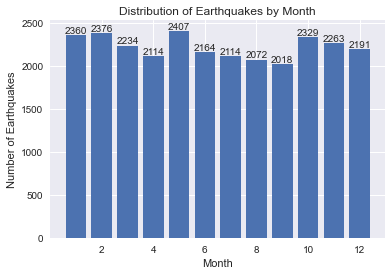

Month with the most earthquakes: 5
Month with the fewest earthquakes: 9


In [20]:
# Plot the bar chart

bars = plt.bar(monthly_counts.index, monthly_counts.values)
plt.title("Distribution of Earthquakes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")


for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(),  
             int(bar.get_height()), ha='center', va='bottom')

plt.show()


print(f"Month with the most earthquakes: {monthly_counts.idxmax()}")
print(f"Month with the fewest earthquakes: {monthly_counts.idxmin()}")



<h2>Frequency distribution of earthquake magnitude</h2>

- Plot a <b>histogram</b> for the frequency distributon of different magnitudes.
- Which magnitude has the highest frequenct? <3, 3-4, 4-5, 5-6, or >6?

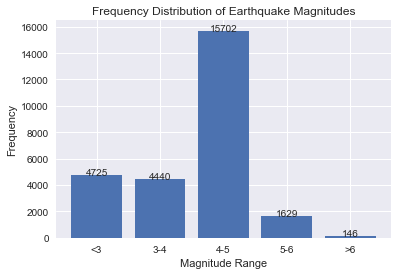

The magnitude range with the highest frequency is: 4-5


In [31]:
# Plot the historgram
less_than_3 = df[df['mag'] < 3].shape[0]
between_3_and_4 = df[(df['mag'] >= 3) & (df['mag'] < 4)].shape[0]#shape[0] is a tuple which 0 means 行數
between_4_and_5 = df[(df['mag'] >= 4) & (df['mag'] < 5)].shape[0]
between_5_and_6 = df[(df['mag'] >= 5) & (df['mag'] < 6)].shape[0]
greater_than_6 = df[df['mag'] >= 6].shape[0]
counts = [less_than_3, between_3_and_4, between_4_and_5, between_5_and_6, greater_than_6]
labels = ['<3', '3-4', '4-5', '5-6', '>6']


plt.bar(labels, counts)

plt.title("Frequency Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude Range")
plt.ylabel("Frequency")


for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center', fontsize=10)#plus 1 at count so it wont overlap with the diagram


plt.show()


most_frequent_magnitude = labels[counts.index(max(counts))]
print(f"The magnitude range with the highest frequency is: {most_frequent_magnitude}")

In [6]:
print('Earthquakes with magnitude xxx the highest frequency.')

Earthquakes with magnitude xxx the highest frequency.


<h2>Relationship between magnitude and depth</h2>

- Plot three <b>scatter plots</b> in <b>one output</b> to analyze the relationship between earthquake magnitude, depth, and rms. 
    - Put magnitude on the x-axis and depth on the y-axis for the first graph.
    - Put magnitude on the x-axis and rms on the y-axis for the second graph.
    - Put depth on the x-axis and rms on the y-axis for the third graph. 
- Are there any noticable patterns among these three variables?
- Answer the following three questions according to your graphs. You don't need to be exact.
    - For the earthquake that has the largest depth, what is its magnitude? 
    - For the earthquake that has the largest rms, what is its magnitude?
    - For the earthquake that has the largest depth, what is its rms?

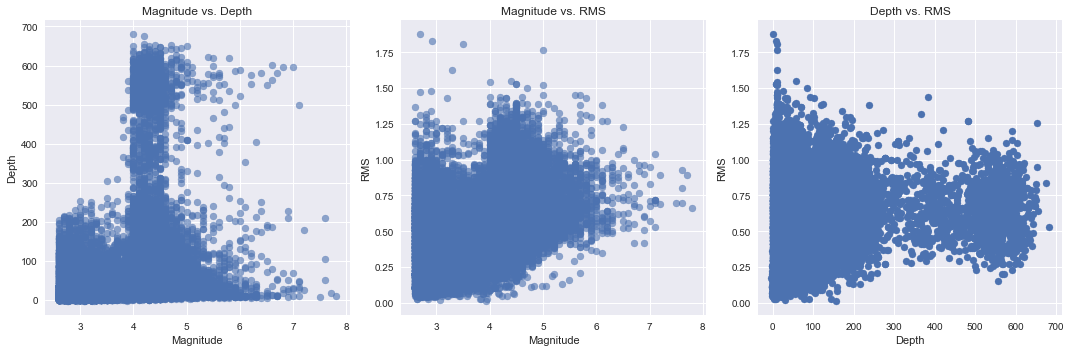

The earthquake with the largest depth has a magnitude of 4.0 and an RMS of 0.53.
The earthquake with the largest RMS has a magnitude of 2.7.


In [35]:
# Plot the scatter plots


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(df['mag'], df['depth'], alpha=0.6)
plt.title('Magnitude vs. Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth')

plt.subplot(1, 3, 2)
plt.scatter(df['mag'], df['rms'], alpha=0.6)
plt.title('Magnitude vs. RMS')
plt.xlabel('Magnitude')
plt.ylabel('RMS')

plt.subplot(1, 3, 3)
plt.scatter(df['depth'], df['rms'])
plt.title('Depth vs. RMS')
plt.xlabel('Depth')
plt.ylabel('RMS')

plt.tight_layout()
plt.show()


largest_depth_row = df.loc[df['depth'].idxmax()]
largest_rms_row = df.loc[df['rms'].idxmax()]

print(f"The earthquake with the largest depth has a magnitude of {largest_depth_row['mag']} and an RMS of {largest_depth_row['rms']}.")
print(f"The earthquake with the largest RMS has a magnitude of {largest_rms_row['mag']}.")




In [36]:
# No standard answer for noticeable patterns. Any reasonable answers are acceptable.
print('The data shows a large number of earthquakes occurring at shallow depths (less than 100 km) and low magnitudes (between 3 and 4)')
print('As the magnitude increases beyond 5, there is a slight spread in RMS values, indicating that larger earthquakes might have slightly higher RMS variability.')
print('The distribution of depth against RMS indicates that most earthquakes occur at shallower depths (below 200 km) and have RMS values around 0.25 to 1.25.')

The data shows a large number of earthquakes occurring at shallow depths (less than 100 km) and low magnitudes (between 3 and 4)
As the magnitude increases beyond 5, there is a slight spread in RMS values, indicating that larger earthquakes might have slightly higher RMS variability.
The distribution of depth against RMS indicates that most earthquakes occur at shallower depths (below 200 km) and have RMS values around 0.5 to 1.5.


<h2>Mean magnitude and depth by month and networks</h2>

- Create a new column '<b>net_new</b>' that converts original 'net' column into three categories: <b>'us', 'pr', 'other'</b>.
- Group the dataframe by <b>'month' and 'net_new'</b>, and calculate the <b>mean</b> magnitude and the <b>mean</b> depth.
- Plot two <b>barcharts</b> in <b>one output</b> to compare mean magnitude and mean depth by month and net. Put 'month' on the x-asix, 'mag'/'depth' on the y-axis, and 'new_net' as color legends.
- Which network has the highest mean mangitude and depth for the reported earthquakes?
- Which measure has larger differences among networks, magnitude or depth?

In [9]:
# Create the 'net_new' column based on conditions


# Group data by month and net_new, and calculate mean mag and depth



# Plot barcharts





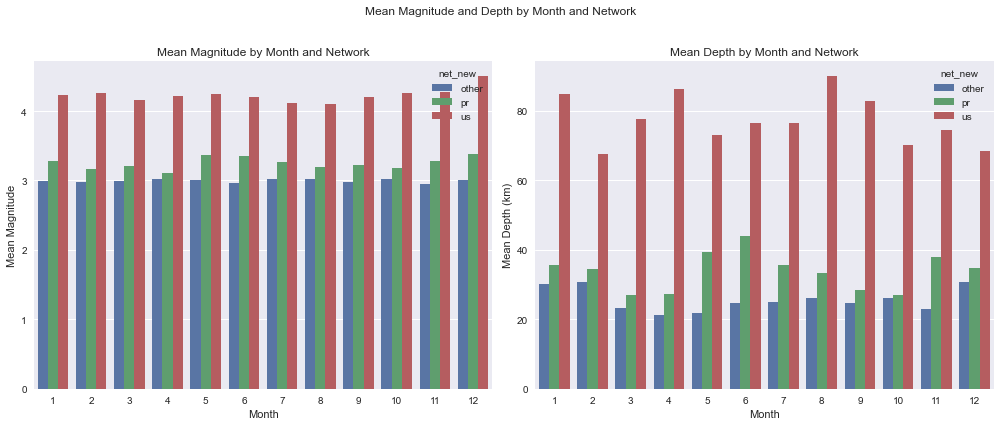

Network with the highest mean magnitude: us
Network with the highest mean depth: us
Larger difference among networks: Depth


In [45]:

df['net_new'] = df['net'].apply(lambda x: x if x in ['us', 'pr'] else 'other')
grouped_data = df.groupby(['month', 'net_new']).agg({'mag': 'mean', 'depth': 'mean'}).reset_index()

plt.figure(figsize=(14, 6))
plt.suptitle('Mean Magnitude and Depth by Month and Network')

plt.subplot(1, 2, 1)
sns.barplot(x='month', y='mag', hue='net_new', data=grouped_data)  #colored by 'net_new'
plt.title('Mean Magnitude by Month and Network')
plt.xlabel('Month')
plt.ylabel('Mean Magnitude')


plt.subplot(1, 2, 2)
sns.barplot(x='month', y='depth', hue='net_new', data=grouped_data)
plt.title('Mean Depth by Month and Network')
plt.xlabel('Month')
plt.ylabel('Mean Depth (km)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


highest_mean_magnitude = grouped_data.loc[grouped_data['mag'].idxmax()]
highest_mean_depth = grouped_data.loc[grouped_data['depth'].idxmax()]


print(f"Network with the highest mean magnitude: {highest_mean_magnitude['net_new']}")
print(f"Network with the highest mean depth: {highest_mean_depth['net_new']}") 


magnitude_range = grouped_data.groupby('net_new')['mag'].mean().max() - grouped_data.groupby('net_new')['mag'].mean().min()
depth_range = grouped_data.groupby('net_new')['depth'].mean().max() - grouped_data.groupby('net_new')['depth'].mean().min()

print(f"Larger difference among networks: {'Magnitude' if magnitude_range > depth_range else 'Depth'}")


<h2>Heatmap</h2>

- Draw a <b>folium heatmap</b> for 2023 earthquakes.
- Center your map at <b>latitude mean and longitude mean, zoom_start=2</b>.
- According to the map, which country had more earthquakes in 2023, Canada or USA?
- Which one had more earthquakes, Western U.S., Central U.S. or Eastern U.S.?

In [58]:
# Your map here


df_2023 = df[df['time'].dt.year == 2023]


lat_mean = df_2023['latitude'].mean()
lon_mean = df_2023['longitude'].mean()


map_2023 = folium.Map(location=[lat_mean, lon_mean], zoom_start=2) #zoom_start=2, the map will start with a view that covers a large portion of the world, giving a global perspective of earthquake locations


locations = df_2023[['latitude', 'longitude']].dropna().values.tolist()

HeatMap(locations, radius=8, blur=8).add_to(map_2023)


map_2023





In [62]:
print('USA had more earthquake.')
print('Western U.S. had more earthquakes.')

USA had more earthquake.
Western U.S. had more earthquakes.
